In [11]:
import Orange
from Orange.classification.rules import CN2Learner, CN2SDUnorderedLearner

# Load dataset
data = Orange.data.Table("iris")

print("\n=== CN2 RULES ===")
cn2 = CN2Learner()
classifier = cn2(data)
for rule in classifier.rule_list:
    print(rule)

print("\n=== FOIL-LIKE RULES ===")
foil = CN2SDUnorderedLearner()
classifier2 = foil(data)
for rule in classifier2.rule_list:
    print(rule)



=== CN2 RULES ===
IF petal length<=3.0 AND sepal width>=2.9 THEN iris=Iris-setosa 
IF petal width>=1.8 AND sepal length>=6.0 THEN iris=Iris-virginica 
IF sepal length>=4.9 AND sepal width>=3.1 THEN iris=Iris-versicolor 
IF petal length<=4.9 AND petal width>=1.7 THEN iris=Iris-virginica 
IF petal width>=1.8 THEN iris=Iris-virginica 
IF petal length<=5.0 AND sepal width>=2.4 THEN iris=Iris-versicolor 
IF sepal width>=2.8 THEN iris=Iris-virginica 
IF petal width<=1.0 AND sepal length>=5.0 THEN iris=Iris-versicolor 
IF sepal width>=2.7 THEN iris=Iris-versicolor 
IF sepal width>=2.6 THEN iris=Iris-virginica 
IF sepal length>=5.5 AND sepal length>=6.2 THEN iris=Iris-versicolor 
IF sepal length<=5.5 AND petal length>=4.0 THEN iris=Iris-versicolor 
IF sepal length>=6.0 THEN iris=Iris-virginica 
IF sepal length<=4.5 THEN iris=Iris-setosa 
IF TRUE THEN iris=Iris-setosa 

=== FOIL-LIKE RULES ===
IF petal length<=3.0 THEN iris=Iris-setosa 
IF petal width<=1.0 AND petal length<=3.3 THEN iris=Iris-

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Temperature <= 1.50
|   |   |--- class: 0
|   |--- Temperature >  1.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- Windy <= 0.50
|   |   |   |   |--- Outlook <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Outlook >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Humidity >  0.50
|   |   |   |--- class: 1



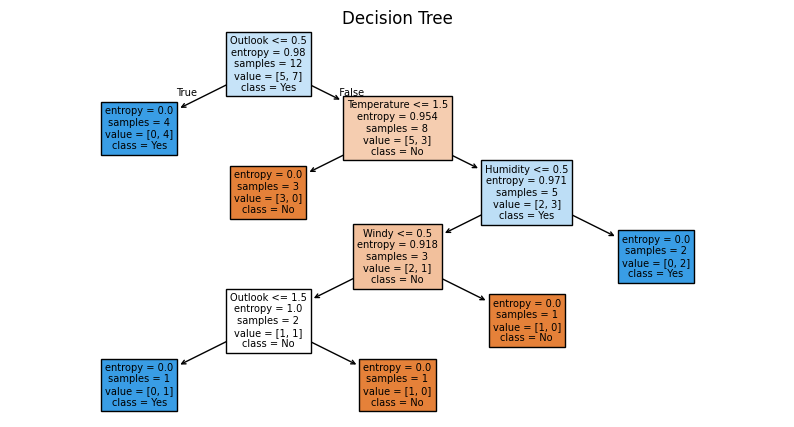

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Data
data = pd.DataFrame([
    ['Sunny','Hot','High','False','No'],
    ['Sunny','Hot','High','True','No'],
    ['Overcast','Hot','High','False','Yes'],
    ['Rain','Mild','High','False','Yes'],
    ['Rain','Cool','Normal','True','No'],
    ['Overcast','Cool','Normal','True','Yes'],
    ['Sunny','Mild','High','False','No'],
    ['Rain','Mild','Normal','False','Yes'],
    ['Sunny','Mild','Normal','True','Yes'],
    ['Overcast','Mild','High','True','Yes'],
    ['Overcast','Hot','Normal','False','Yes'],
    ['Rain','Mild','High','True','No']
], columns=['Outlook','Temperature','Humidity','Windy','Play'])

# Train + rules
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)
print(export_text(clf, feature_names=list(X.columns)))

# Plot
plt.figure(figsize=(10, 5))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.title("Decision Tree")
plt.show()


In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Bagging with Decision Tree
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

# Boosting (AdaBoost) with Decision Stumps (depth=1)
boosting = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)

# Performance Comparison
print("=== Bagging Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

print("\n=== Boosting Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print(classification_report(y_test, y_pred_boost))


=== Bagging Performance ===
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


=== Boosting Performance ===
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

